In [162]:
import requests as rq
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 構想 1: 驗證氣溫與購買商品的關係
### ex:可以在夏季時，推短袖買一送一，長袖外套半價等


In [182]:
t = list()
for month in range(12):
    url = 'https://www.cwb.gov.tw/V7/climate/monthlyData/Data/mD2017%s.htm' %(str(month+1))
    temp=pd.read_html(url)
    t.append(temp[0][1][25])#台北測站月平均溫度

In [136]:
df = pd.read_csv('Ntu_Orders.csv')
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
index = pd.date_range('2017-1-1', periods=12, freq='M')

In [176]:
hot = list() #休閒短裙/褲每月總數量
cold = list() #休閒長裙/褲每月總數量
for m in range(12):
    a = df[(df['new_DateId'] <= index[m]) & (df['new_DateId'] >= '2017-%s'%str(m+1))]
    aa = pd.DataFrame(a.groupby(by='LevelFourCategoryName')['Quantity'].sum())
    hot.append(aa.Quantity['休閒短裙/褲'])
    cold.append(aa.Quantity['高領衫/毛衣'])

In [177]:
hot

[2857, 3831, 10417, 15372, 17172, 11745, 9201, 6512, 6015, 8122, 8652, 5473]

In [178]:
cold

[412, 118, 51, 8, 2, 2, 7, 307, 95, 5071, 4907, 5079]

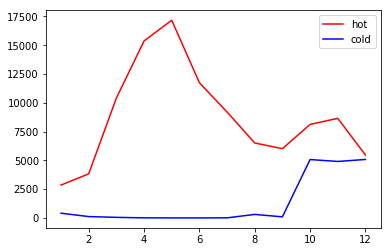

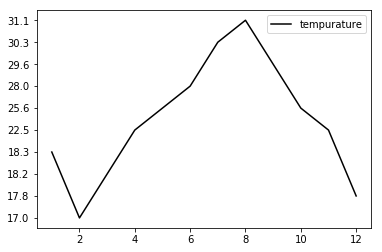

In [191]:
plt.plot(np.arange(len(hot))+1,hot,'r')
plt.plot(np.arange(len(cold))+1,cold,'b')

plt.legend(['hot','cold','tempurature'])
plt.show()
plt.plot(np.arange(len(t))+1,t,'k')
plt.legend(['tempurature'])
plt.show()

# 可以由氣溫得知是在最冷/熱2到3月前，顧客購買對應的衣物最多，可在ㄘ

In [101]:
for month in range(12):
    a = pd.DataFrame(df.groupby(by='new_DateId')[]['Quantity'].sum())
aa = pd.DataFrame(a.groupby(by='LevelFourCategoryName')['Quantity'].sum())
aa.Quantity['休閒短裙/褲']


8652

In [89]:
aa

,Quantity
LevelFourCategoryName,
T恤/帽T,49053
三角褲,680
休閒短裙/褲,8652
休閒長裙/褲,14901
保護套/殼,1
內搭褲,13799
其他,1597
單寧短裙/褲,756
單寧長裙/褲,7885


In [53]:
df[0]

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,2017年01月 氣象資料,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,項目 溫度(℃) 雨量 風速(公尺/秒)/風向 (360°)/日期 相對溼度(%)...,項目,溫度(℃),雨量,風速(公尺/秒)/風向 (360°)/日期,相對溼度(%),測站氣壓,降水日數 >=0.1毫米,日照時數,測站,...,23.4/29,5.9/20,138.6,10.2/30.0/30,19.1/40.0/24,88.0,59/28,950.7,19.0,96.2
2,項目,溫度(℃),雨量,風速(公尺/秒)/風向 (360°)/日期,相對溼度(%),測站氣壓,降水日數 >=0.1毫米,日照時數,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,測站,平均,最高/ 日期,最低/ 日期,(毫米),最大十分鐘風,最大瞬間風,平均,最小/ 日期,(百帕),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,阿里山,8.3,17.7/5,-0.1/27,10.0,5.3/360.0/15,11.7/360.0/15,74,23/27,766.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,鞍部,11.6,22.5/29,3.8/20,179.5,8.2/360.0/20,18.6/130.0/16,94,57/29,926.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,板橋,18.1,27.3/1,11.9/27,25.0,7.6/60.0/31,14.0/40.0/31,73,45/27,1019.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,成功,20.1,27.2/30,14.5/20,46.9,9.3/20.0/30,15.8/30.0/26,76,55/27,1015.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,嘉義,19.0,28.7/29,11.9/28,1.3,5.3/360.0/20,10.5/330.0/21,74,39/29,1015.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,大武,21.8,27.9/8,17.0/26,18.0,8.2/30.0/30,16.9/30.0/30,67,41/27,1018.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 抓氣象局台北測站的2017月平均溫度

In [52]:
df[0][1][25]

'18.3'

# 構想 2:能依照當時各地區氣候在官網放相對應的商品
### ex:若台北正在下雨，在官網放雨衣、雨傘等商品